### Number of Differences EADAM, MM

This graph looks at the total number of differences between the EADAM and GS and MM and gale shapley respectively. Creates a Histogram to compare them. So these are the number of changes each algorithm inflicts on the original GS matching. 

#### Histograms


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib as mpl   
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')

In [2]:
def get_data(n, k, eadam=False):
    if eadam == True:
        df = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_diff_eadam.csv')
        df['n_changes_eadam'] = df['n_changes_eadam']/2
    else:
        df = pd.read_csv(f'data/simulations/max_length_matches/n_{n}_k_{k}_max_length_diff.csv')
    return df

In [3]:
def get_combined(n,k):
    df = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_diff.csv')
    df_eadam = pd.read_csv(f'data/simulations/max_length_matches_w_eadam/n_{n}_k_{k}_max_diff_eadam.csv')
    #df_eadam = df_eadam.iloc[:-10, :]
    #df = df.iloc[:-10, :]
    df_eadam['n_changes_eadam'] = df_eadam['n_changes_eadam']/2
    df['label'] = 'MM'
    df_eadam['label'] = 'EADAM'
    df_eadam.columns = df.columns
    df = pd.concat([df, df_eadam])
    return df

In [4]:
df = get_combined(4000, 5)

In [5]:
df

,Unnamed: 0,n,k,n_changes,n_matches,label
0,0,4000,5,121.0,3640,MM
1,1,4000,5,27.0,3648,MM
2,2,4000,5,97.0,3646,MM
3,3,4000,5,13.0,3639,MM
4,4,4000,5,193.0,3633,MM
...,...,...,...,...,...,...
9995,9995,4000,5,15.0,3642,EADAM
9996,9996,4000,5,58.0,3621,EADAM
9997,9997,4000,5,43.0,3623,EADAM
9998,9998,4000,5,139.0,3634,EADAM


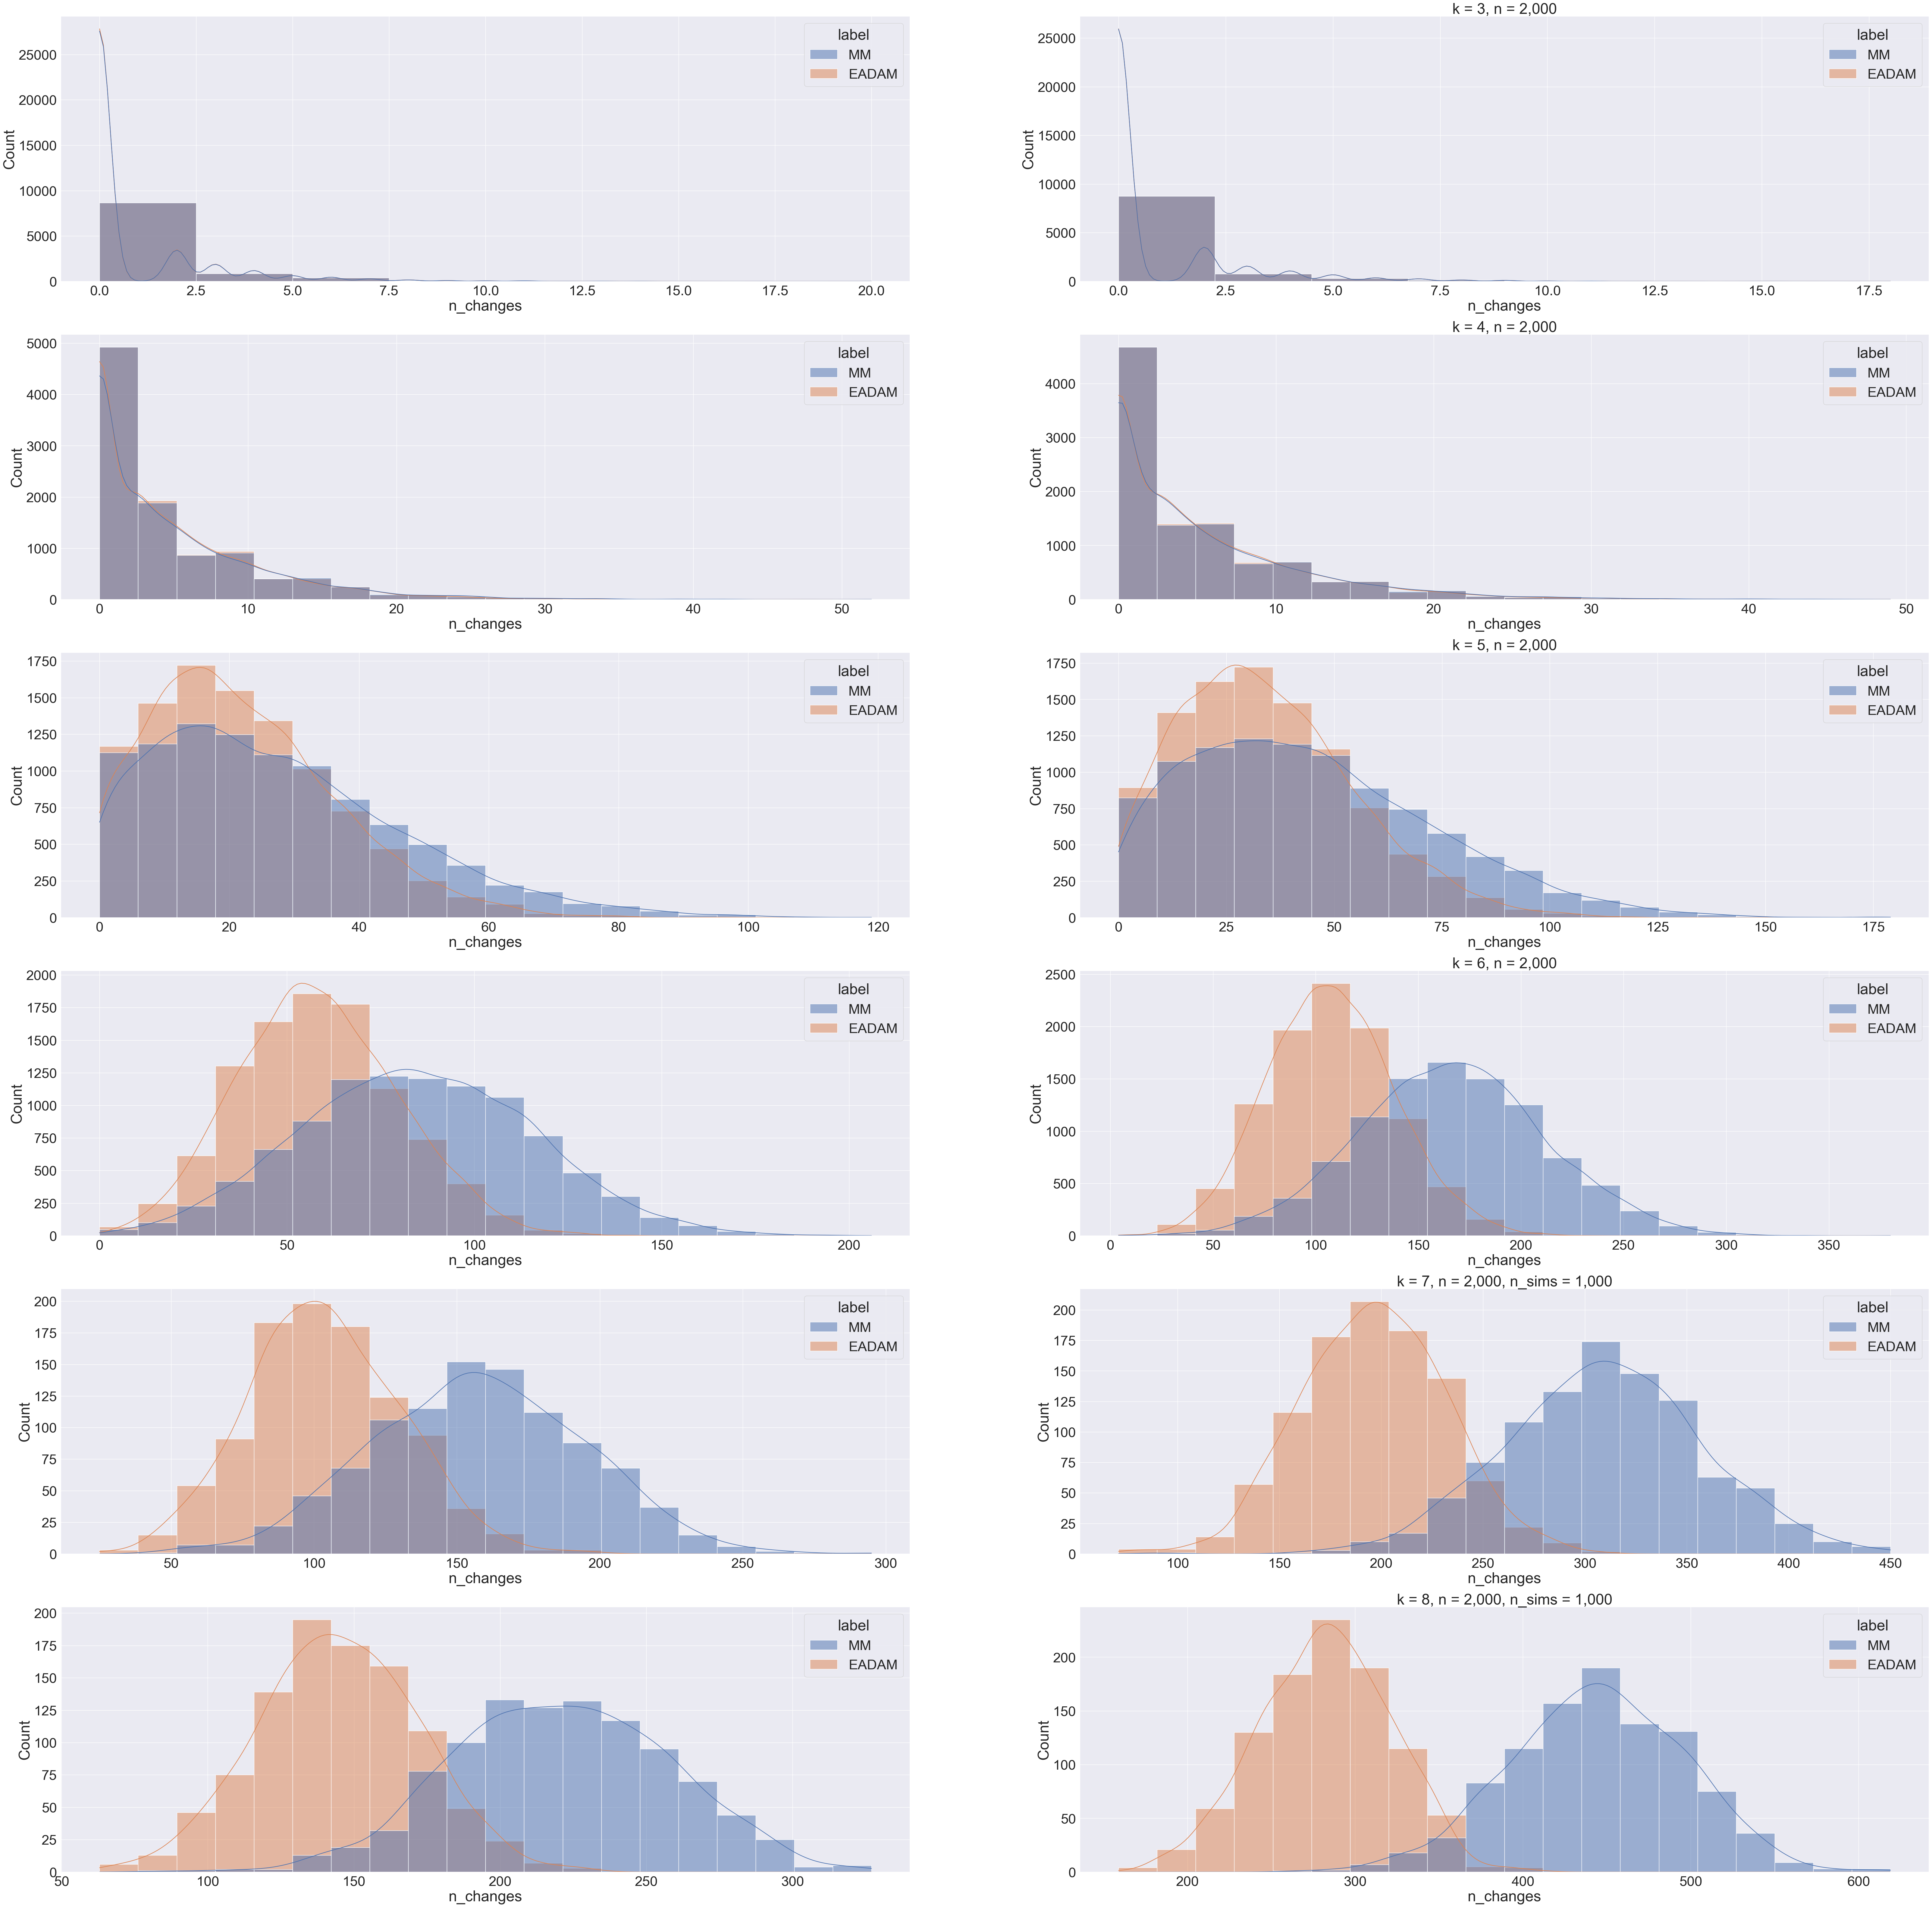

In [38]:
fig, ax = plt.subplots(6, 2, figsize=(80, 80))

mpl.rc('font', size=40)
sns.set(font_scale = 3)
ks = [3,4,5,6, 7,8]
## Graphs 1-4
for k in ks:
    df = get_combined(1000, k)
    if k ==3:
        sns.histplot(data=df, x='n_changes', hue='label', ax=ax[k-3, 0], bins=8, kde=True)
    else:
        sns.histplot(data=df, x='n_changes', hue='label', ax=ax[k-3, 0], bins=20, kde=True)
    if k == 7 or k == 8:
        ax[k-3, 1].set_title(f'k = {k}, n = 1,000, n_sims = 1,000')
    else:
        ax[k-3, 1].set_title(f'k = {k}, n = 1,000')## Graphs 5-8
for k in ks:
    df = get_combined(2000, k)
    if k == 3:
        sns.histplot(data=df, x='n_changes', hue='label', ax=ax[k-3, 1], bins=8, kde=True)
    else:
        sns.histplot(data=df, x='n_changes', hue='label', ax=ax[k-3, 1], bins=20, kde=True)
    if k == 7 or k == 8:
        ax[k-3, 1].set_title(f'k = {k}, n = 2,000, n_sims = 1,000')
    else:
        ax[k-3, 1].set_title(f'k = {k}, n = 2,000')




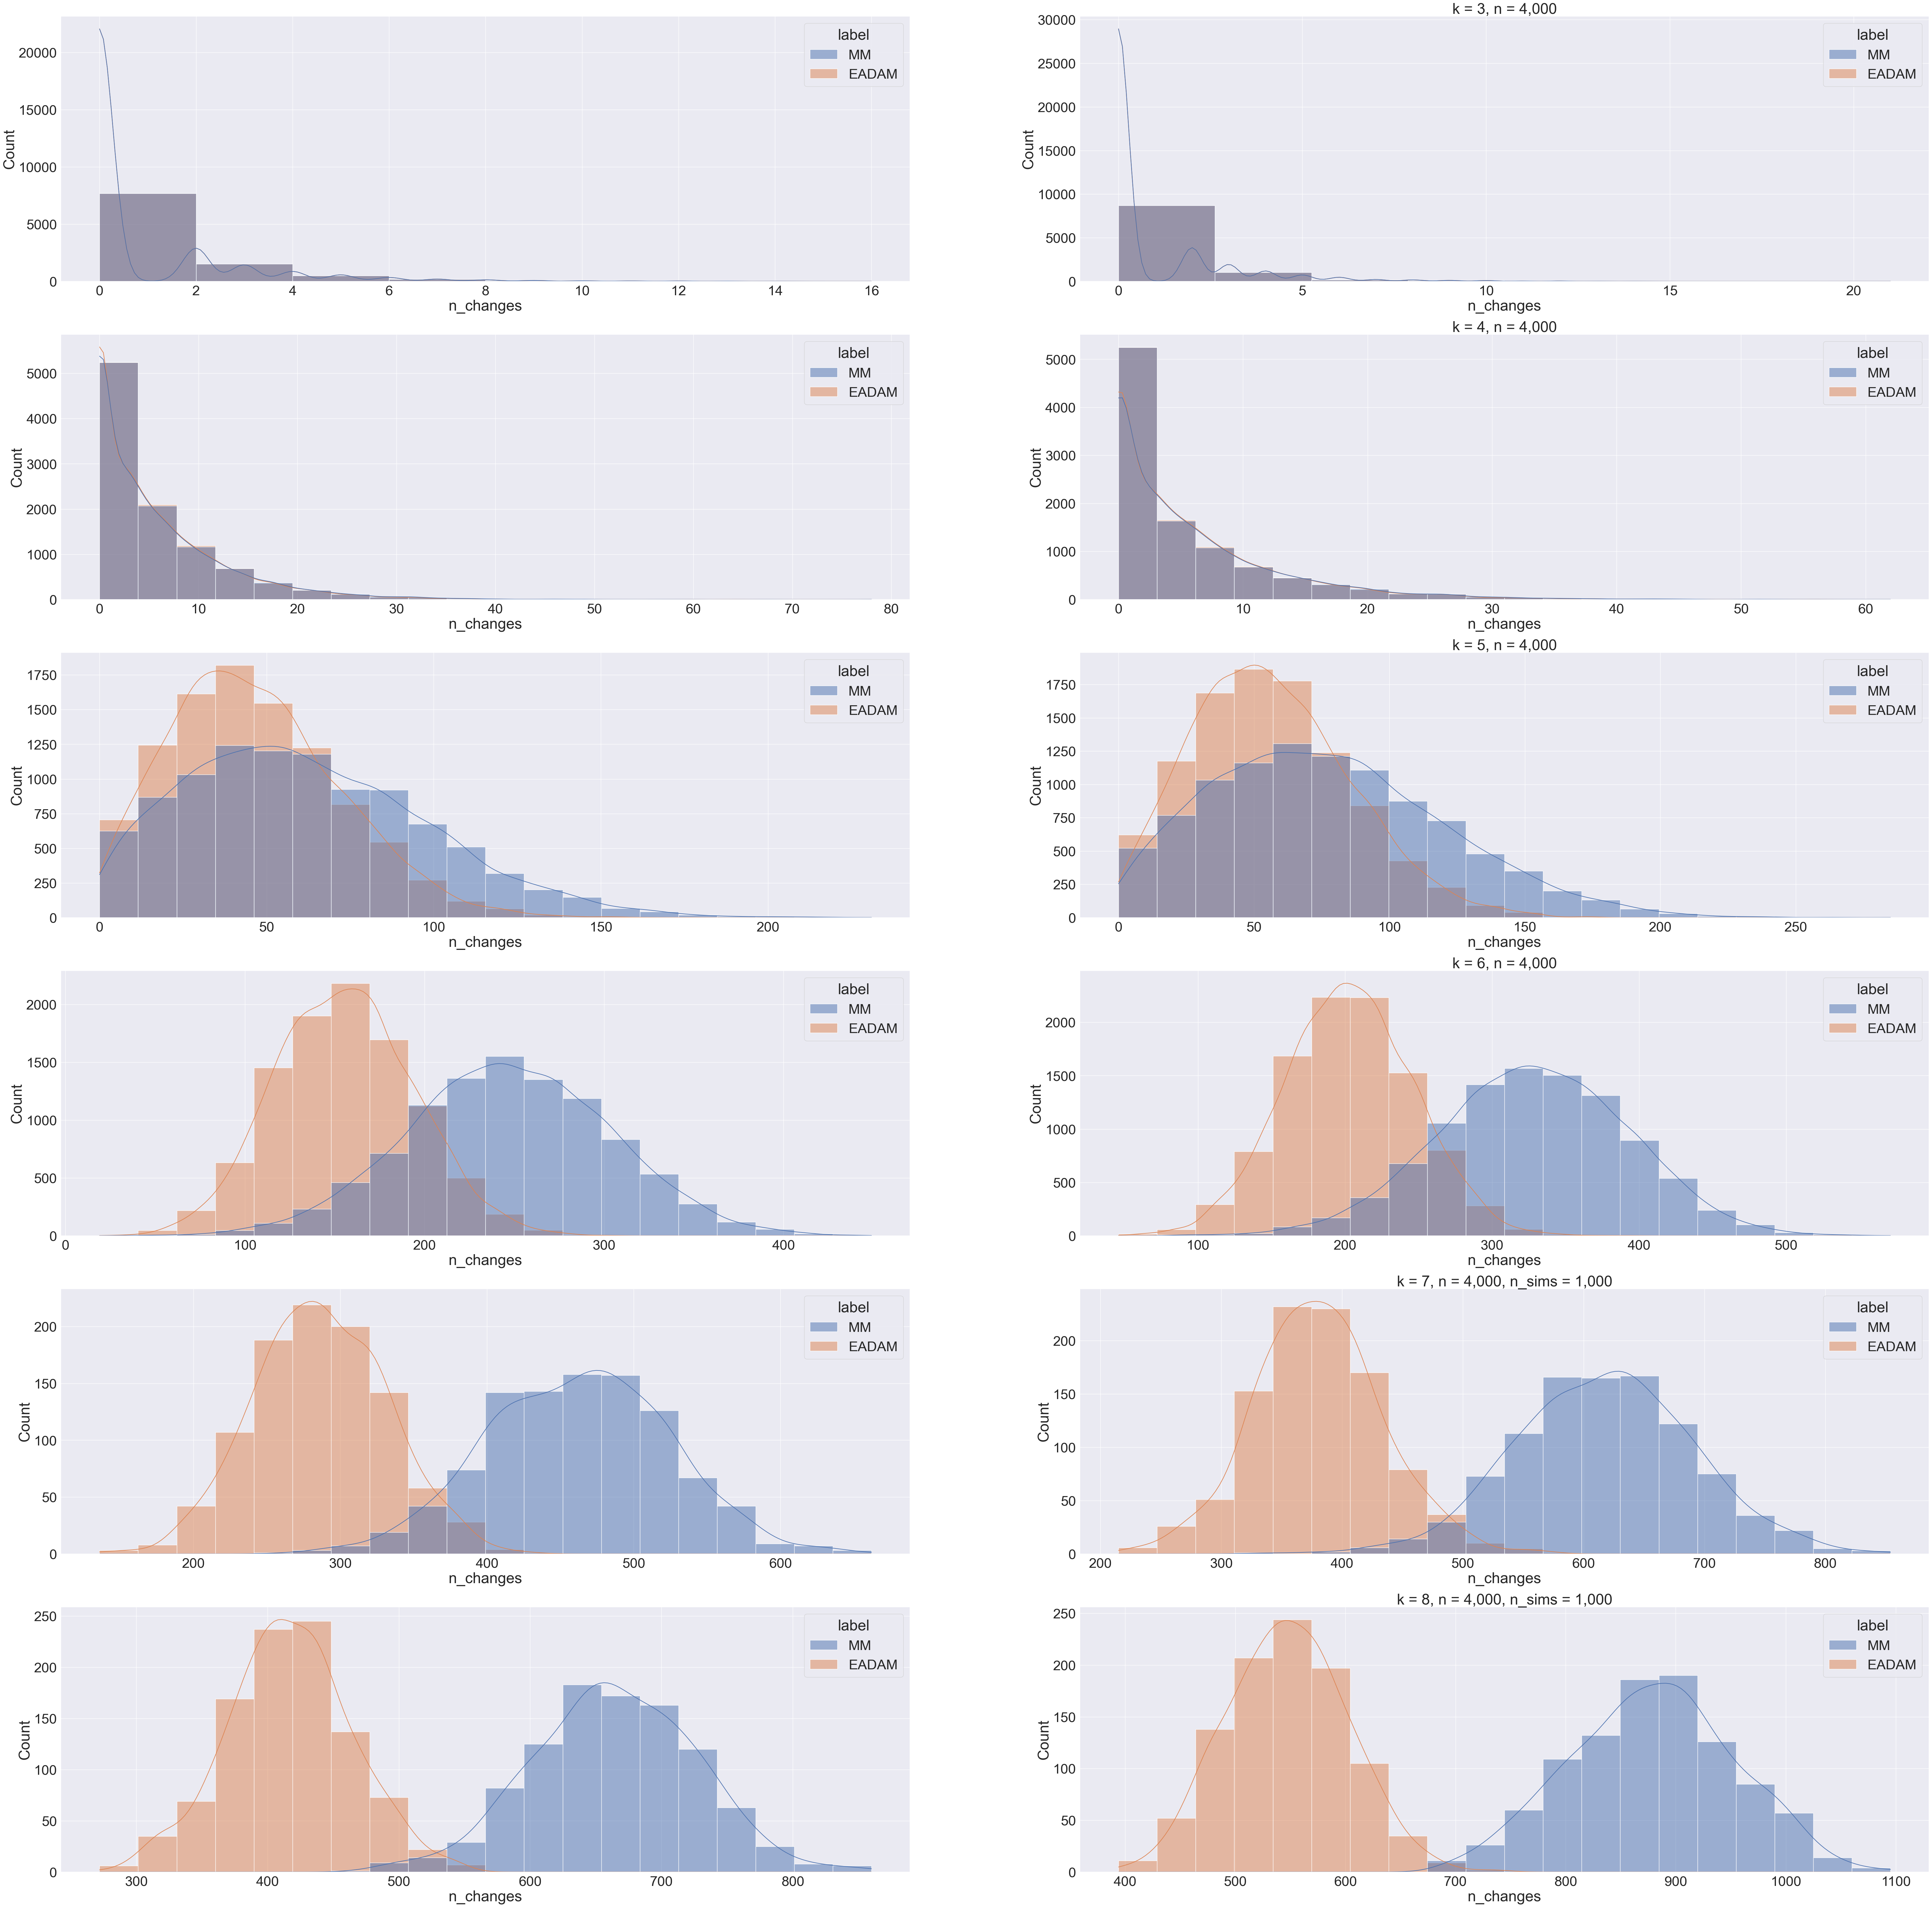

In [39]:
fig, ax = plt.subplots(6, 2, figsize=(80, 80))

mpl.rc('font', size=40)
sns.set(font_scale = 3)
ks = [3,4,5,6, 7, 8]

## Graphs 9-12
for k in ks:
    df = get_combined(3000, k)
    if k == 3:
        sns.histplot(data=df, x='n_changes', hue='label', ax=ax[k-3, 0], bins=8, kde=True)
    else:
        sns.histplot(data=df, x='n_changes', hue='label', ax=ax[k-3, 0], bins=20, kde=True)
    if k == 7 or k == 8:
        ax[k-3, 1].set_title(f'k = {k}, n = 3,000, n_sims = 1,000')
    else:
        ax[k-3, 1].set_title(f'k = {k}, n = 3,000')
    
## Graphs 13-16
for k in ks:
    df = get_combined(4000, k)
    if k == 3:
        sns.histplot(data=df, x='n_changes', hue='label', ax=ax[k-3, 1], bins=8, kde=True)
    else:
        sns.histplot(data=df, x='n_changes', hue='label', ax=ax[k-3, 1], bins=20, kde=True)
    if k == 7 or k == 8:
        ax[k-3, 1].set_title(f'k = {k}, n = 4,000, n_sims = 1,000')
    else:
        ax[k-3, 1].set_title(f'k = {k}, n = 4,000')

### Mean and Standard Deviation of the number of differences between the EADAM and GS and MM and gale shapley respectively:

This is to be added to the table we're making which collects some useful information. 

In [27]:
ns = [1000, 2000, 3000, 4000]
ks = [3,4,5,6]
df1 = pd.DataFrame()
for n in ns:
    for k in ks:
        df = get_combined(n, k)
        df1 = pd.concat([df1, df])

In [31]:
df1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [34]:
grouped = df1.groupby(by = ['n', 'k', 'label'], as_index=False).mean()
grouped['std'] = df1.groupby(by = ['n', 'k', 'label'], as_index=False).std()['n_changes']
pivoted = grouped.pivot(index = ['n', 'k'], columns = 'label', values = ['n_changes', 'std'])

In [35]:
pivoted.to_excel('data/means_and_stds.xlsx')